In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv(
    "reports_iss_vaccini.csv",
    parse_dates=[
        "data", "pubblicazione", "popolazione_giorno",
        "diagnosi_start", "diagnosi_end",
        "ricoveri_start", "ricoveri_end",
        "intensive_start", "intensive_end",
        "decessi_start", "decessi_end"
    ]
)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   data                     192 non-null    datetime64[ns]
 1   pubblicazione            192 non-null    datetime64[ns]
 2   url                      192 non-null    object        
 3   fascia                   192 non-null    object        
 4   vaccino                  192 non-null    object        
 5   popolazione              192 non-null    int64         
 6   diagnosi                 192 non-null    int64         
 7   ricoveri                 192 non-null    int64         
 8   intensive                192 non-null    int64         
 9   decessi                  192 non-null    int64         
 10  popolazione_giorno       192 non-null    datetime64[ns]
 11  diagnosi_start           192 non-null    datetime64[ns]
 12  diagnosi_end             192 non-nul

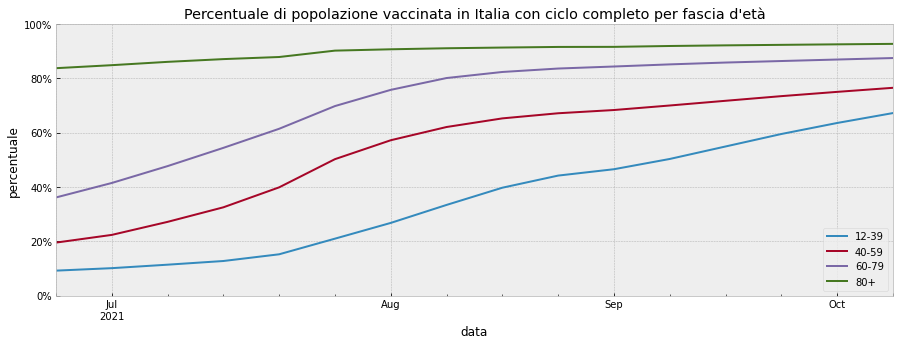

In [5]:
with plt.style.context("bmh"):
    fig, ax = plt.subplots(figsize=(15, 5))
    for fascia in df.fascia.unique():
        _df = df[(df.fascia==fascia)&(df.vaccino=="vaccinati completo")]
        _df.plot(x='popolazione_giorno', y='percentuale_popolazione', label=fascia, ax=ax)
    ax.set(
        ylim=(0, 1),
        xlabel="data",
        ylabel="percentuale",
        title="Percentuale di popolazione vaccinata in Italia con ciclo completo per fascia d'età"
    )
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
    plt.show()

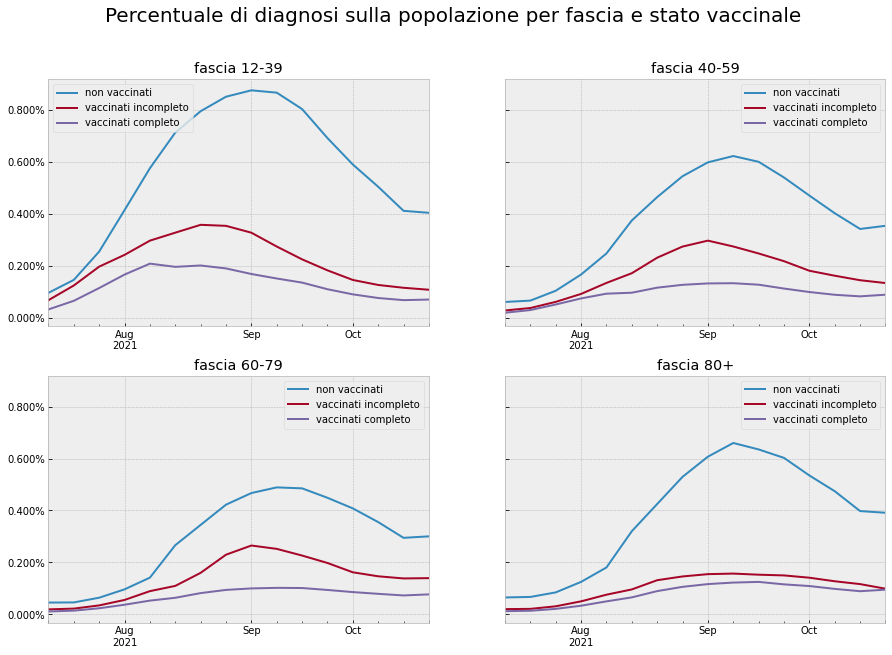

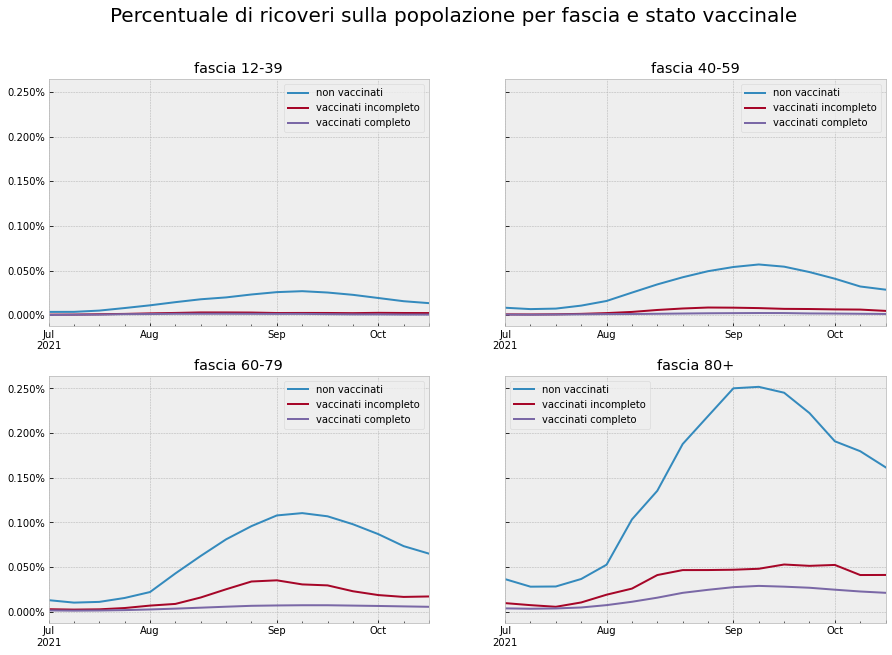

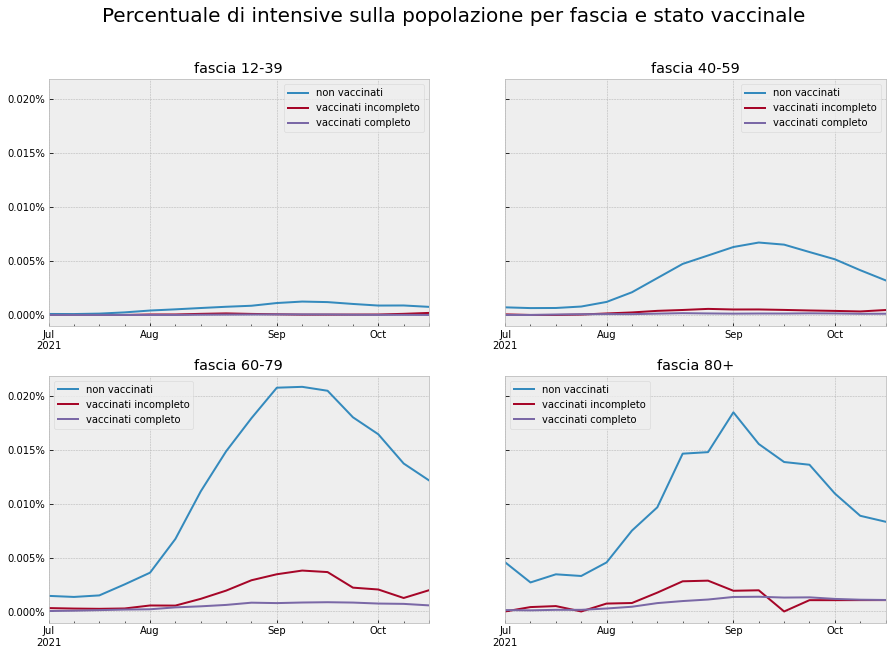

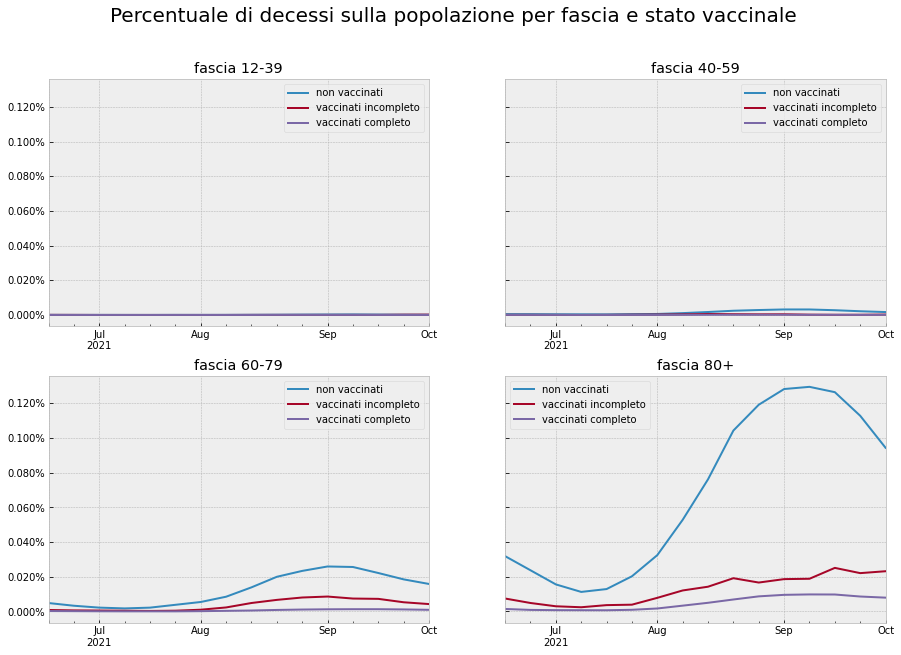

In [6]:
with plt.style.context("bmh"):
    for y in ["diagnosi", "ricoveri", "intensive", "decessi"]:
        fig, ax = plt.subplots(2, 2, figsize=(15, 10), facecolor="w", sharey=True)
        for i, fascia in enumerate(df.fascia.unique()):
            for v in df.vaccino.unique():
                df[(df.fascia==fascia)&(df.vaccino==v)].plot(
                    x=f"{y}_end", y=f"percentuale_{y}", ax=ax.flat[i], label=v)
            ax.flat[i].set(title=f"fascia {fascia}", xlabel="")
            ax.flat[i].yaxis.set_major_formatter(mtick.PercentFormatter(1, 3))
        fig.suptitle(f"Percentuale di {y} sulla popolazione per fascia e stato vaccinale", fontsize=20,)
        plt.show()

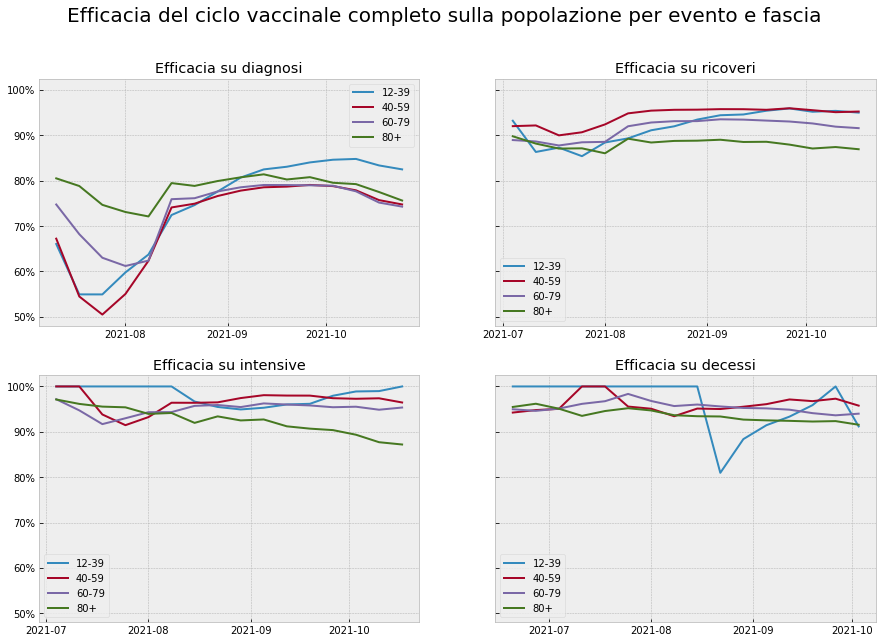

In [9]:
with plt.style.context("bmh"):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10), facecolor="w", sharey=True)
    for i, y in enumerate(["diagnosi", "ricoveri", "intensive", "decessi"]):
        for fascia in df.fascia.unique():
            E_c = 1 - (
                df[(df.fascia==fascia)&(df.vaccino=="vaccinati completo")][f"percentuale_{y}"].values
                /
                df[(df.fascia==fascia)&(df.vaccino=="non vaccinati")][f"percentuale_{y}"].values
            )
            ax.flat[i].plot(df[f"{y}_end"].unique(), E_c, label=fascia)
            ax.flat[i].set(title=f"Efficacia su {y}", xlabel="")
            ax.flat[i].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
            ax.flat[i].xaxis.set_major_locator(mdates.MonthLocator())
            ax.flat[i].legend()
    fig.suptitle(f"Efficacia del ciclo vaccinale completo sulla popolazione per evento e fascia", fontsize=20,)
    plt.show()